In [14]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

from tqdm import tqdm

In [ ]:
data = np.load('..\singlewrf_reconstruction\chunk_wnunr_data.npy')
np.shape(data)

(529663, 33)

In [16]:
train, val = train_test_split(data, random_state=137) # setting the seed for reproducibility; the default train/test split is 0.75/0.25
print('lenght of training set', len(train), '\nlenght of validation set', len(val), '\nwidth of the sets: # of features + 1 flag (1-LL/0-TX)', len(train[0]))

lenght of training set 397247 
lenght of validation set 132416 
width of the sets: # of features + 1 flag (1-LL/0-TX) 33


In [17]:
# strip the last feature (e.g. the flag) from the sets

# first line check
print('first train line, before flag-stripping', train[0])

# copy in dedicated arrays
flags_train = train[:, -1]
flags_val = val[:, -1]
# delete from the sets
train = train[:, :-1]
val = val[:, :-1]
# width check
print('width of the samples, after flag-stripping', len(train[0]), len(val[0]))
# first line check
print('first train line, after flag-stripping', train[0])

first train line, before flag-stripping [ 0.13412625 -0.11301199 -0.46605533 -0.1469966  -0.00772949  0.84309191
 -0.49300742 -0.49719825 -1.34492654  1.21953607 -1.07748831  0.08446103
 -0.12570594 -0.43956452  0.52343606 -1.1291556   0.62708814 -0.02873644
  0.60745234  0.56382517  0.82737035 -2.05202525  1.06055892  1.90418458
 -0.15814041 -0.66057235 -0.16412687 -0.43296179 -0.40013415 -0.44811687
 -1.16306579 -0.47332004  1.        ]
width of the samples, after flag-stripping 32 32
first train line, after flag-stripping [ 0.13412625 -0.11301199 -0.46605533 -0.1469966  -0.00772949  0.84309191
 -0.49300742 -0.49719825 -1.34492654  1.21953607 -1.07748831  0.08446103
 -0.12570594 -0.43956452  0.52343606 -1.1291556   0.62708814 -0.02873644
  0.60745234  0.56382517  0.82737035 -2.05202525  1.06055892  1.90418458
 -0.15814041 -0.66057235 -0.16412687 -0.43296179 -0.40013415 -0.44811687
 -1.16306579 -0.47332004]


In [18]:
# tensorize the data, so that pytorch doesn't whine
train = torch.tensor(train, dtype=torch.float32)
val = torch.tensor(val, dtype=torch.float32)
flags_train = torch.tensor(flags_train, dtype=torch.float32)
flags_val = torch.tensor(flags_val, dtype=torch.float32)

In [ ]:
model = torch.load('model.pt', weights_only=False)
#model.eval()

myModel(
  (dense1): Linear(in_features=32, out_features=64, bias=True)
  (BatchNorm1d1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.1, inplace=False)
  (dense2): Linear(in_features=64, out_features=32, bias=True)
  (BatchNorm1d2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.1, inplace=False)
  (dense3): Linear(in_features=32, out_features=32, bias=True)
  (BatchNorm1d3): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (dropout3): Dropout(p=0.1, inplace=False)
  (dense4): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

# Shap

In [21]:
import shap
from torch.autograd import Variable

In [22]:
torch.set_grad_enabled(False)
f = lambda x: model( Variable( torch.from_numpy(x) ) ).detach().numpy()

In [23]:
data = val.detach().numpy()[0:100]
explainer = shap.KernelExplainer(f, data)

In [24]:
shap_values = explainer.shap_values(data)

  0%|          | 0/100 [00:00<?, ?it/s]

In [25]:
np.shape(shap_values.T[0].T)

(100, 32)

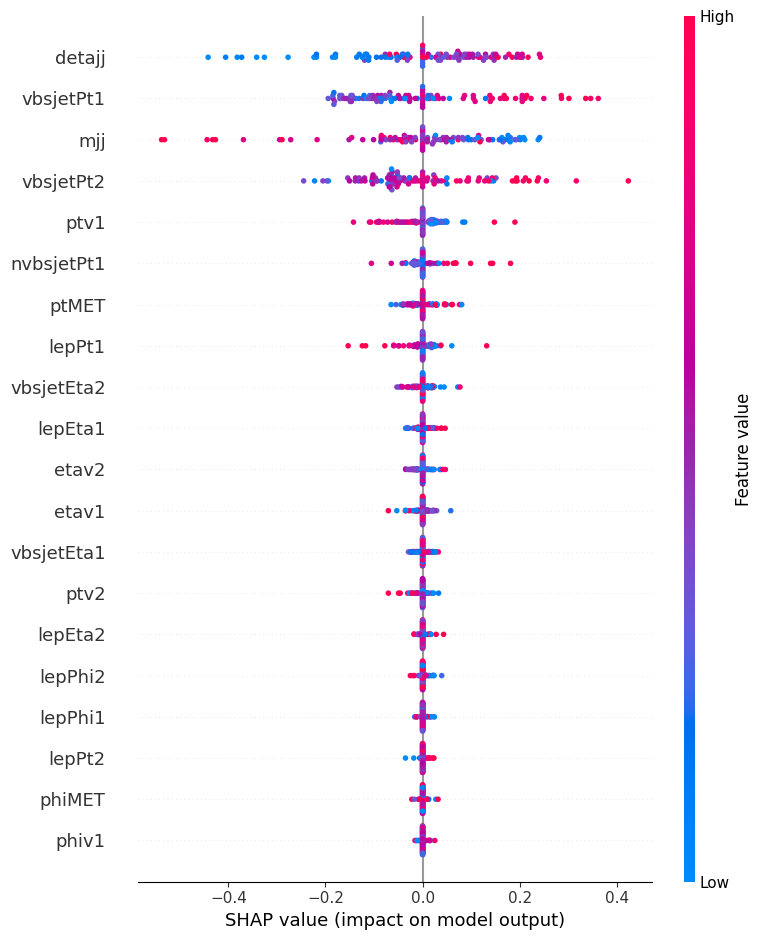

In [26]:
features_names = ['lepPt1', 'lepPt2', 'lepEta1', 'lepEta2', 'lepPhi1', 'lepPhi2', 'vbsjetPt1', 'vbsjetPt2', 'vbsjetEta1', 'vbsjetEta2', 'vbsjetPhi1', 'vbsjetPhi2', 'vbsjetM1', 'vbsjetM2', 'nvbsjetPt1', 'nvbsjetPt2', 'nvbsjetEta1', 'nvbsjetEta2', 'nvbsjetPhi1', 'nvbsjetPhi2', 'nvbsjetM1', 'nvbsjetM2', 'mjj', 'detajj', 'ptMET', 'phiMET', 'ptv1', 'ptv2', 'etav1', 'etav2', 'phiv1', 'phiv2']
shap.summary_plot(shap_values.T[0].T, data, features_names)

In [27]:
#